In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_stock.csv')

In [3]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


## Training

In [5]:
df_single_symbol = df[df['symbol'] == 'AAPL'].copy()

features = ['open','high','low','close','volume']

X = df_single_symbol[features]
y = df_single_symbol['close'].shift(-1)

X = X[:-1]
y = y[:-1]

#there is no next day for last day


- Basically we are taking in X features of a single symbol and for y we are taking close which is for the next days close

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False)

- As we are working with time series data we dont want the data to be randomly distributed so shuffle=False

In [7]:
X_train

,open,high,low,close,volume
14008,76.3799,77.8356,76.3142,77.7756,76960156
136090,126.0600,127.4800,125.5700,126.4600,74474466
247604,98.6800,100.1300,96.4300,96.4500,81094428
319629,105.5800,106.0000,105.2800,105.8700,27408650
467215,154.1800,155.4400,154.0500,155.3900,21283769
...,...,...,...,...,...
51280,92.3142,92.7670,91.8013,92.4785,75951141
131200,116.3200,119.1900,115.5600,118.9000,84436432
423482,153.5800,155.4500,152.8900,155.4500,27770715
212033,113.2500,115.5000,112.3700,115.0000,50219475


In [8]:
y_train

14008      77.7128
136090    127.0800
247604     96.9600
319629    107.4800
467215    155.3000
            ...   
51280      92.2242
131200    117.1600
423482    153.9300
212033    114.7100
49340      89.8071
Name: close, Length: 804, dtype: float64

## Regression Problems
- Linear
- Decision Tree
- KNN

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,r2_score

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg_models = {
    "Linear Regression" : LinearRegression(),
    "DecisionTree Regressor" : DecisionTreeRegressor(max_depth=5),
    "KNeighbors Regressor" : KNeighborsRegressor(n_neighbors=5)
}

results = {}

for name, model in reg_models.items():
    model.fit(X_train_scaled, y_train)

    y_pred_scale = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_scale))
    r2 = r2_score(y_test, y_pred_scale)
    results[name] = {"RMSE": rmse, "R2": r2}

for name, metrics in results.items():
    print(f"{name} -  R2: {metrics['R2']:.4f}, RMSE: {metrics['RMSE']:.4f}")

Linear Regression -  R2: 0.9956, RMSE: 1.5881
DecisionTree Regressor -  R2: 0.9934, RMSE: 1.9441
KNeighbors Regressor -  R2: 0.9939, RMSE: 1.8804


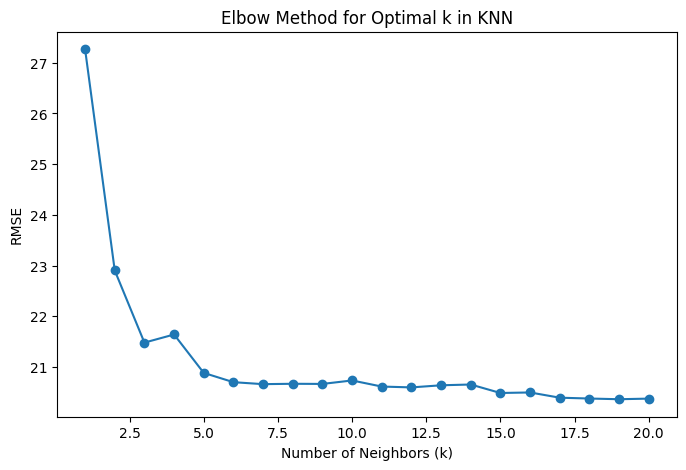

In [37]:
k_values = range(1,21)
rmse_values = []

for i in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("Elbow Method for Optimal k in KNN")
plt.show()

## Predicting the Next Days closing price using linear reg. (the best one)

In [50]:
best_reg_model = LinearRegression()
best_reg_model.fit(X_train_scaled, y_train)

def predict_next_day_price(open_price,high_price,low_price,close_price, volume):

    input_data = np.array([[open_price, high_price, low_price, close_price, volume]])
    input_data_scale = scaler.transform(input_data)

    predict_price = best_reg_model.predict(input_data_scale)

    return predict_price[0]

In [54]:
sample_data = {
    'open': 78.98,
    'high': 79.09,
    'low': 77.20,
    'close': 77.28,
    'volume': 98303870
}

next_day_prediction = predict_next_day_price(
    sample_data['open'],
    sample_data['high'],
    sample_data['low'],
    sample_data['close'],
    sample_data['volume']
)

print(f"Based on the provided data, the predicted closing price for the next day is: ${next_day_prediction:.2f}")


Based on the provided data, the predicted closing price for the next day is: $77.47


c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
df_aapl = df[df['symbol'] == 'AAPL']
print(df_aapl)


       symbol        date      open      high       low     close     volume
1        AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185   58791957
484      AAPL  2014-01-03   78.9799   79.0999   77.2042   77.2828   98303870
967      AAPL  2014-01-06   76.7785   78.1142   76.2285   77.7042  103359151
1450     AAPL  2014-01-07   77.7599   77.9942   76.8464   77.1481   79432766
1933     AAPL  2014-01-08   76.9728   77.9371   76.9556   77.6371   64686685
...       ...         ...       ...       ...       ...       ...        ...
494948   AAPL  2017-12-22  174.6800  175.4240  174.5000  175.0100   16349444
495453   AAPL  2017-12-26  170.8000  171.4700  169.6790  170.5700   33185536
495958   AAPL  2017-12-27  170.1000  170.7800  169.7100  170.6000   21498213
496463   AAPL  2017-12-28  171.0000  171.8500  170.4800  171.0800   16480187
496968   AAPL  2017-12-29  170.5200  170.5900  169.2200  169.2300   25999922

[1007 rows x 7 columns]


## Categorical Problem
- Logistc
- Decision Tree
- KNN

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [56]:
X_cat = X

price_change = df_single_symbol['close'].diff().shift(-1)
y_cat = (price_change > 0).astype(int)

y_cat = y_cat[:-1]

scaler = StandardScaler()
X_scaled_cat = scaler.fit_transform(X_cat)
X_train_Cat, X_test_Cat, y_train_Cat, y_test_Cat = train_test_split(X_scaled_cat, y_cat, test_size=0.2, shuffle=False)

In [77]:
class_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=3),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results_cat = {}

for name,model in class_models.items():
    model.fit(X_train_Cat, y_train_Cat)
    y_pred_cat = model.predict(X_test_Cat)

    accuracy = accuracy_score(y_test_Cat, y_pred_cat)

    results_cat[name] = accuracy

for name, acc in results_cat.items():

    print(f"{name}: {acc*100:.2f}%")

Logistic Regression: 48.02%
Decision Tree: 51.98%
KNN: 52.97%


- The results arent that great but it also reflect but difficult it can be to predict if the price might go up or down
- Similarly although we got a great accuracy on daily price prediction as it was a daily basis but it cannt calculate that well

## KMeans

In [78]:
df['daily_return'] =  df.groupby('symbol')['close'].pct_change()

In [99]:
df.head()

,symbol,date,open,high,low,close,volume,daily_return
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,0.0
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,0.0
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,0.0
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,0.0
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,0.0


In [103]:
df['symbol'].value_counts()

symbol
YUM     1007
XYL     1007
XRX     1007
XRAY    1007
XOM     1007
        ... 
DXC      189
BHGE     126
BHF      117
DWDP      83
APTV      18
Name: count, Length: 505, dtype: int64

In [98]:
df['daily_return'].fillna(0, inplace=True)

In [ ]:
new = df.groupby('symbol')['daily_return'].agg(['mean','std']).rename(columns={'mean':'avg_return','std':'volatility'})

new.dropna(inplace=True)
new.replace([np.inf,-np.inf], np.nan, inplace=True)
new.dropna(inplace=True)

X_mean = new[['avg_return','volatility']].values
X_scaled_mean = scaler.fit_transform(X_mean)


In [101]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled_mean)

new['cluster'] = kmeans.labels_

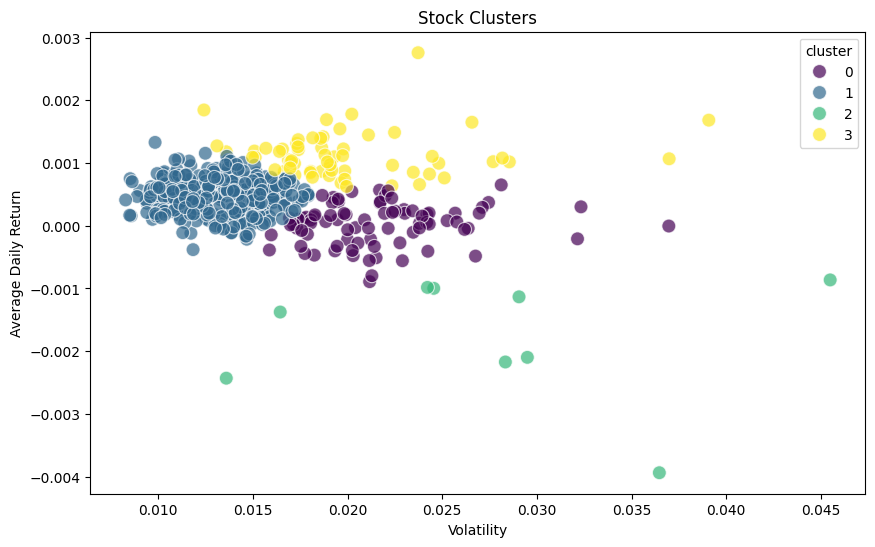

In [105]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=new['volatility'], y=new['avg_return'], hue=new['cluster'], palette='viridis', s=100, alpha=0.7)
plt.xlabel('Volatility')
plt.ylabel('Average Daily Return')
plt.title('Stock Clusters')
plt.show()

In [106]:
import plotly.express as px

fig = px.scatter(
    new.reset_index(),                    # reset_index so 'symbol' becomes a column
    x='volatility',
    y='avg_return',
    color='cluster',
    hover_data=['symbol'],                # shows stock symbol on hover
    title='Stock Clusters'
)

fig.show()


- Volatile is basically risk